In [1]:
#import packages
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
#from intake import open_catalog
import cartopy.io.shapereader as shpreader
import mygrads as mg
#import Ngl
#import Nio
#import fiona
import matplotlib as mpl
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.feature import NaturalEarthFeature
from cartopy.feature import COASTLINE
from clim680_function import xyticks
import pymannkendall as mk

In [2]:
f='/project/xprecip/merra2_ncfiles/t2m/resampled/temp_6hrmean.nc'
DS_temp=xr.open_dataset(f)
DS_temp

<xarray.Dataset>
Dimensions:  (lat: 62, lon: 117, time: 62700)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2022-11-30T18:00:00
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -56.25 -55.62 -55.0
  * lat      (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 50.5 51.0 51.5 52.0 52.5
Data variables:
    T2M      (time, lat, lon) float32 ...

In [3]:
temp=DS_temp['T2M']
temp

<xarray.DataArray 'T2M' (time: 62700, lat: 62, lon: 117)>
[454825800 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2022-11-30T18:00:00
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -56.25 -55.62 -55.0
  * lat      (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 50.5 51.0 51.5 52.0 52.5

In [4]:
winter_selected_temp=temp.isel(time=temp.time.dt.season.isin(['DJF']))
winter_selected_temp

<xarray.DataArray 'T2M' (time: 15400, lat: 62, lon: 117)>
[111711600 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2022-02-28T18:00:00
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -56.25 -55.62 -55.0
  * lat      (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 50.5 51.0 51.5 52.0 52.5

In [5]:
first5yrs=winter_selected_temp.sel(time=slice('1980-01-01','1985-12-31'))
first5yrs

<xarray.DataArray 'T2M' (time: 2168, lat: 62, lon: 117)>
[15726672 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 1985-12-31T18:00:00
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -56.25 -55.62 -55.0
  * lat      (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 50.5 51.0 51.5 52.0 52.5

In [6]:
values=first5yrs.groupby('time.month').quantile(0.95,dim='time')
values

<xarray.DataArray 'T2M' (month: 3, lat: 62, lon: 117)>
array([[[294.37378235, 294.29763489, 294.26079712, ..., 298.15517883,
         298.05439148, 297.97973633],
        [294.23183594, 294.12555695, 294.04003906, ..., 298.0720459 ,
         297.96342773, 297.85052338],
        [294.13877411, 294.06799011, 293.93949738, ..., 297.92651978,
         297.80055237, 297.70956726],
        ...,
        [279.48480988, 275.01570587, 273.53957062, ..., 272.21405334,
         272.84515533, 273.3721344 ],
        [277.73810272, 274.57462769, 273.06238403, ..., 271.41710358,
         272.44814301, 273.24547577],
        [276.11339569, 273.68260803, 273.23741608, ..., 271.49339752,
         272.42822723, 273.20289612]],

       [[294.25106049, 294.23036041, 294.08947144, ..., 297.584375  ,
         297.54593353, 297.46645508],
        [294.02597809, 294.01508179, 293.95802612, ..., 297.50352173,
         297.46480865, 297.41148071],
        [293.82333832, 293.5924408 , 293.7223526 , ..., 297.38023376,
         297.39250793, 297.33111877],
...
        [279.04377289, 274.79032593, 273.1817215 , ..., 273.18506317,
         273.42206573, 273.43360443],
        [277.79144897, 274.44193268, 272.99006805, ..., 272.93369751,
         273.11585999, 273.38241272],
        [275.53975067, 273.37316132, 273.23724365, ..., 273.0523407 ,
         273.21882782, 273.36499481]],

       [[295.2792984 , 295.29633331, 295.19595642, ..., 298.90582123,
         298.88181915, 298.83996277],
        [294.9970047 , 295.02558289, 294.9032547 , ..., 298.82031555,
         298.77828827, 298.74399872],
        [294.72960052, 294.74851074, 294.65368347, ..., 298.72213135,
         298.68301239, 298.64025726],
        ...,
        [278.7285965 , 275.10835266, 273.59193726, ..., 273.85854797,
         274.2444397 , 274.47890625],
        [277.11786499, 274.46828766, 273.23676758, ..., 273.22564697,
         273.92257996, 274.40018005],
        [275.39265747, 273.34557495, 273.28031158, ..., 273.12003174,
         273.79767914, 274.25274811]]])
Coordinates:
  * lon       (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -56.25 -55.62 -55.0
  * lat       (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 51.0 51.5 52.0 52.5
    quantile  float64 0.95
  * month     (month) int64 1 2 12

## 95th Percentile

### First 5 years

In [7]:
dec_vals=values.sel(month=12)
dec_vals

<xarray.DataArray 'T2M' (lat: 62, lon: 117)>
array([[295.2792984 , 295.29633331, 295.19595642, ..., 298.90582123,
        298.88181915, 298.83996277],
       [294.9970047 , 295.02558289, 294.9032547 , ..., 298.82031555,
        298.77828827, 298.74399872],
       [294.72960052, 294.74851074, 294.65368347, ..., 298.72213135,
        298.68301239, 298.64025726],
       ...,
       [278.7285965 , 275.10835266, 273.59193726, ..., 273.85854797,
        274.2444397 , 274.47890625],
       [277.11786499, 274.46828766, 273.23676758, ..., 273.22564697,
        273.92257996, 274.40018005],
       [275.39265747, 273.34557495, 273.28031158, ..., 273.12003174,
        273.79767914, 274.25274811]])
Coordinates:
  * lon       (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -56.25 -55.62 -55.0
  * lat       (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 51.0 51.5 52.0 52.5
    quantile  float64 0.95
    month     int64 12

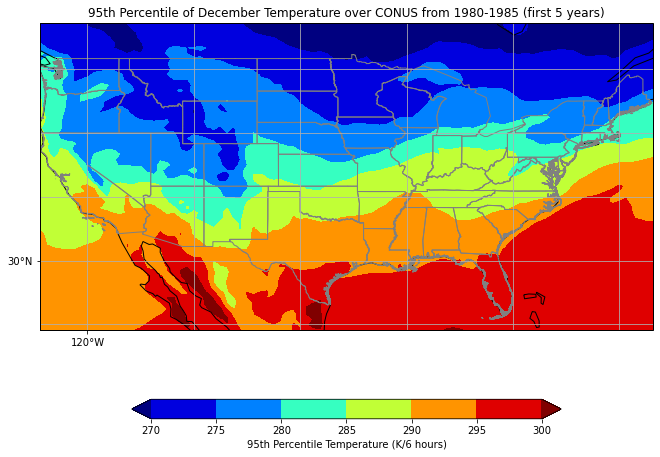

In [10]:
#clevs=np.arange(-1.0,1.0,10)
#max_val=1.0
#increment=0.25

#clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=dec_vals
data,lon=add_cyclic_point(data,coord=dec_vals['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,dec_vals['lat'],
            data,
            transform=ccrs.PlateCarree(),
            cmap='jet',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')


# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='95th Percentile Temperature (K/6 hours)')

# Add title
plt.title('95th Percentile of December Temperature over CONUS from 1980-1985 (first 5 years)')
plt.savefig('/homes/areed29/CLIM997/summer22_research/dec_earlyperiod_temp_95th.png')

In [11]:
jan_ts=values.sel(month=1)
jan_ts

<xarray.DataArray 'T2M' (lat: 62, lon: 117)>
array([[294.37378235, 294.29763489, 294.26079712, ..., 298.15517883,
        298.05439148, 297.97973633],
       [294.23183594, 294.12555695, 294.04003906, ..., 298.0720459 ,
        297.96342773, 297.85052338],
       [294.13877411, 294.06799011, 293.93949738, ..., 297.92651978,
        297.80055237, 297.70956726],
       ...,
       [279.48480988, 275.01570587, 273.53957062, ..., 272.21405334,
        272.84515533, 273.3721344 ],
       [277.73810272, 274.57462769, 273.06238403, ..., 271.41710358,
        272.44814301, 273.24547577],
       [276.11339569, 273.68260803, 273.23741608, ..., 271.49339752,
        272.42822723, 273.20289612]])
Coordinates:
  * lon       (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -56.25 -55.62 -55.0
  * lat       (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 51.0 51.5 52.0 52.5
    quantile  float64 0.95
    month     int64 1

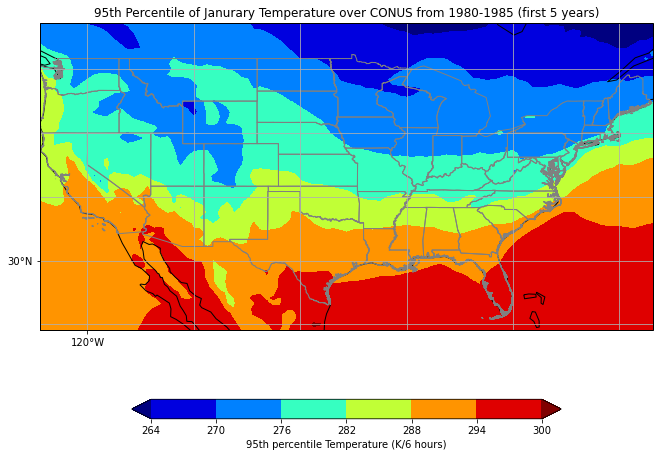

In [12]:

fig = plt.figure(figsize=(11,8.5))
#max_val=20
#increment=5

#clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=jan_ts
data,lon=add_cyclic_point(data,coord=jan_ts['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,jan_ts['lat'],
            data,
            transform=ccrs.PlateCarree(),
            cmap='jet',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='95th percentile Temperature (K/6 hours)')

# Add title
plt.title('95th Percentile of Janurary Temperature over CONUS from 1980-1985 (first 5 years)')
plt.savefig('/homes/areed29/CLIM997/summer22_research/jan_earlyperiod_temp_95th.png')

In [13]:
feb_ts=values.sel(month=2)
feb_ts

<xarray.DataArray 'T2M' (lat: 62, lon: 117)>
array([[294.25106049, 294.23036041, 294.08947144, ..., 297.584375  ,
        297.54593353, 297.46645508],
       [294.02597809, 294.01508179, 293.95802612, ..., 297.50352173,
        297.46480865, 297.41148071],
       [293.82333832, 293.5924408 , 293.7223526 , ..., 297.38023376,
        297.39250793, 297.33111877],
       ...,
       [279.04377289, 274.79032593, 273.1817215 , ..., 273.18506317,
        273.42206573, 273.43360443],
       [277.79144897, 274.44193268, 272.99006805, ..., 272.93369751,
        273.11585999, 273.38241272],
       [275.53975067, 273.37316132, 273.23724365, ..., 273.0523407 ,
        273.21882782, 273.36499481]])
Coordinates:
  * lon       (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -56.25 -55.62 -55.0
  * lat       (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 51.0 51.5 52.0 52.5
    quantile  float64 0.95
    month     int64 2

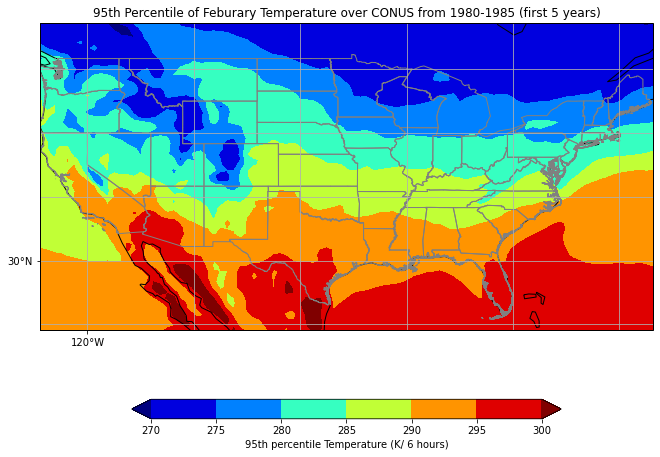

In [14]:
#max_val=25
#increment=5

#clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)


fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=feb_ts
data,lon=add_cyclic_point(data,coord=feb_ts['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,feb_ts['lat'],
            data,
            transform=ccrs.PlateCarree(),
            cmap='jet',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')


# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='95th percentile Temperature (K/ 6 hours)')

# Add title
plt.title('95th Percentile of Feburary Temperature over CONUS from 1980-1985 (first 5 years)')
plt.savefig('/homes/areed29/CLIM997/summer22_research/feb_earlyperiod_temp_95th.png')

### Last 5 years

In [15]:
last5yrs=winter_selected_temp.sel(time=slice('2017-01-01','2022-12-31'))
last5yrs

<xarray.DataArray 'T2M' (time: 2040, lat: 62, lon: 117)>
[14798160 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2017-01-01 ... 2022-02-28T18:00:00
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -56.25 -55.62 -55.0
  * lat      (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 50.5 51.0 51.5 52.0 52.5

In [16]:
values_last=last5yrs.groupby('time.month').quantile(0.95,dim='time')
values_last

<xarray.DataArray 'T2M' (month: 3, lat: 62, lon: 117)>
array([[[295.06944733, 295.1061142 , 294.93721008, ..., 298.53797607,
         298.48976593, 298.44606018],
        [294.75376892, 294.8508728 , 294.79654083, ..., 298.46696777,
         298.35654602, 298.32435455],
        [294.52897186, 294.56156769, 294.54103394, ..., 298.40397034,
         298.30678101, 298.23456573],
        ...,
        [278.47610779, 274.2726532 , 273.22663727, ..., 272.86478577,
         273.14462128, 273.45382233],
        [277.12228088, 274.29969788, 272.95979309, ..., 272.12648163,
         272.91924591, 273.30070038],
        [275.40967712, 273.39327393, 273.23649139, ..., 272.41086426,
         272.83291016, 273.21398926]],

       [[294.14966583, 294.26052856, 294.2671051 , ..., 298.11875153,
         298.12538147, 298.05286407],
        [293.91757202, 293.92086792, 294.00585175, ..., 298.03697205,
         297.98711395, 297.92573547],
        [293.78866577, 293.69501495, 293.71341705, ..., 297.94628906,
         297.88335419, 297.80249023],
...
        [277.68287659, 273.3751297 , 272.32148743, ..., 272.31669617,
         272.81153107, 273.01705933],
        [276.10301208, 273.65488434, 272.35916901, ..., 271.69792175,
         272.49105835, 272.82021332],
        [274.68943787, 273.15612793, 272.88865662, ..., 271.76554871,
         272.37799835, 272.75144958]],

       [[295.39020386, 295.47557831, 295.54781342, ..., 299.52835846,
         299.49858246, 299.39887848],
        [295.07587585, 295.13272095, 295.13220367, ..., 299.41394196,
         299.35990295, 299.31119537],
        [294.79029541, 294.82814941, 294.84316101, ..., 299.27490387,
         299.21754913, 299.19088745],
        ...,
        [278.66749268, 274.30380554, 272.71571655, ..., 274.14605865,
         274.69377441, 275.11700287],
        [277.07397461, 274.07629089, 272.46197357, ..., 273.3375824 ,
         274.16057129, 274.74948578],
        [275.45843506, 273.23842621, 272.98033447, ..., 273.19650116,
         274.03905029, 274.53911133]]])
Coordinates:
  * lon       (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -56.25 -55.62 -55.0
  * lat       (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 51.0 51.5 52.0 52.5
    quantile  float64 0.95
  * month     (month) int64 1 2 12

In [17]:
dec_ts=values_last.sel(month=12)
dec_ts

<xarray.DataArray 'T2M' (lat: 62, lon: 117)>
array([[295.39020386, 295.47557831, 295.54781342, ..., 299.52835846,
        299.49858246, 299.39887848],
       [295.07587585, 295.13272095, 295.13220367, ..., 299.41394196,
        299.35990295, 299.31119537],
       [294.79029541, 294.82814941, 294.84316101, ..., 299.27490387,
        299.21754913, 299.19088745],
       ...,
       [278.66749268, 274.30380554, 272.71571655, ..., 274.14605865,
        274.69377441, 275.11700287],
       [277.07397461, 274.07629089, 272.46197357, ..., 273.3375824 ,
        274.16057129, 274.74948578],
       [275.45843506, 273.23842621, 272.98033447, ..., 273.19650116,
        274.03905029, 274.53911133]])
Coordinates:
  * lon       (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -56.25 -55.62 -55.0
  * lat       (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 51.0 51.5 52.0 52.5
    quantile  float64 0.95
    month     int64 12

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as 

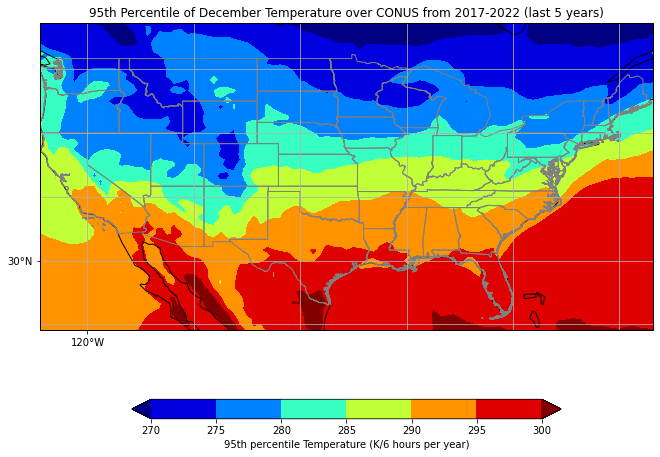

In [18]:
#clevs=np.arange(-1.0,1.0,10)
#max_val=25
#increment=5

#clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=dec_ts
data,lon=add_cyclic_point(data,coord=dec_ts['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,dec_ts['lat'],
            data,
            transform=ccrs.PlateCarree(),
            cmap='jet',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')


# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='95th percentile Temperature (K/6 hours per year)')

# Add title
plt.title('95th Percentile of December Temperature over CONUS from 2017-2022 (last 5 years)')
plt.savefig('/homes/areed29/CLIM997/summer22_research/dec_laterperiod_temp_95th.png')

In [19]:
jan_ts=values_last.sel(month=1)
jan_ts

<xarray.DataArray 'T2M' (lat: 62, lon: 117)>
array([[295.06944733, 295.1061142 , 294.93721008, ..., 298.53797607,
        298.48976593, 298.44606018],
       [294.75376892, 294.8508728 , 294.79654083, ..., 298.46696777,
        298.35654602, 298.32435455],
       [294.52897186, 294.56156769, 294.54103394, ..., 298.40397034,
        298.30678101, 298.23456573],
       ...,
       [278.47610779, 274.2726532 , 273.22663727, ..., 272.86478577,
        273.14462128, 273.45382233],
       [277.12228088, 274.29969788, 272.95979309, ..., 272.12648163,
        272.91924591, 273.30070038],
       [275.40967712, 273.39327393, 273.23649139, ..., 272.41086426,
        272.83291016, 273.21398926]])
Coordinates:
  * lon       (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -56.25 -55.62 -55.0
  * lat       (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 51.0 51.5 52.0 52.5
    quantile  float64 0.95
    month     int64 1

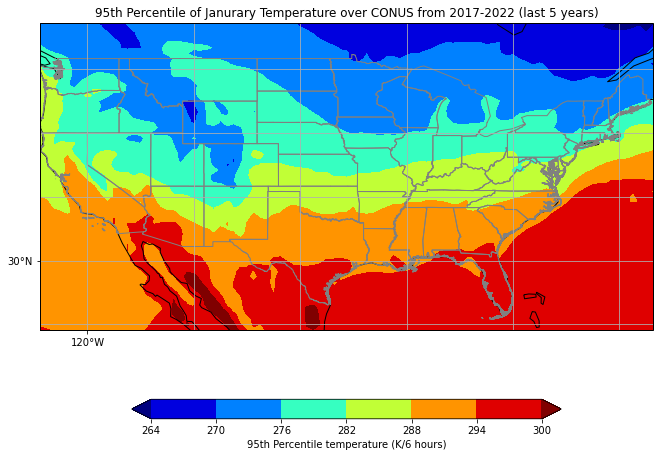

In [20]:

fig = plt.figure(figsize=(11,8.5))
#max_val=25
#increment=5

#clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=jan_ts
data,lon=add_cyclic_point(data,coord=jan_ts['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,jan_ts['lat'],
            data,
            transform=ccrs.PlateCarree(),
            cmap='jet',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='95th Percentile temperature (K/6 hours)')

# Add title
plt.title('95th Percentile of Janurary Temperature over CONUS from 2017-2022 (last 5 years)')
plt.savefig('/homes/areed29/CLIM997/summer22_research/jan_laterperiod_temp_95th.png')

In [21]:
feb_ts=values_last.sel(month=2)
feb_ts

<xarray.DataArray 'T2M' (lat: 62, lon: 117)>
array([[294.14966583, 294.26052856, 294.2671051 , ..., 298.11875153,
        298.12538147, 298.05286407],
       [293.91757202, 293.92086792, 294.00585175, ..., 298.03697205,
        297.98711395, 297.92573547],
       [293.78866577, 293.69501495, 293.71341705, ..., 297.94628906,
        297.88335419, 297.80249023],
       ...,
       [277.68287659, 273.3751297 , 272.32148743, ..., 272.31669617,
        272.81153107, 273.01705933],
       [276.10301208, 273.65488434, 272.35916901, ..., 271.69792175,
        272.49105835, 272.82021332],
       [274.68943787, 273.15612793, 272.88865662, ..., 271.76554871,
        272.37799835, 272.75144958]])
Coordinates:
  * lon       (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -56.25 -55.62 -55.0
  * lat       (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 51.0 51.5 52.0 52.5
    quantile  float64 0.95
    month     int64 2

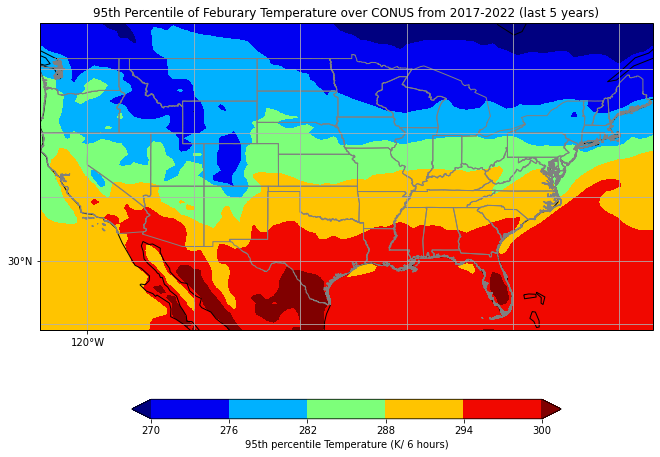

In [22]:
#max_val=25
#increment=5

#clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)


fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=feb_ts
data,lon=add_cyclic_point(data,coord=feb_ts['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,feb_ts['lat'],
            data,
            transform=ccrs.PlateCarree(),
            cmap='jet',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')


# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='95th percentile Temperature (K/ 6 hours)')

# Add title
plt.title('95th Percentile of Feburary Temperature over CONUS from 2017-2022 (last 5 years)')
plt.savefig('/homes/areed29/CLIM997/summer22_research/feb_laterperiod_temp_95th.png')

### Difference maps (later period-early period)

In [23]:
#I. December
diff_dec_95th=values_last.sel(month=12)-values.sel(month=12)
print(diff_dec_95th)

<xarray.DataArray 'T2M' (lat: 62, lon: 117)>
array([[ 0.11090546,  0.179245  ,  0.35185699, ...,  0.62253723,
         0.61676331,  0.55891571],
       [ 0.07887115,  0.10713806,  0.22894897, ...,  0.5936264 ,
         0.58161469,  0.56719666],
       [ 0.06069489,  0.07963867,  0.18947754, ...,  0.55277252,
         0.53453674,  0.55063019],
       ...,
       [-0.06110382, -0.80454712, -0.8762207 , ...,  0.28751068,
         0.44933472,  0.63809662],
       [-0.04389038, -0.39199677, -0.77479401, ...,  0.11193542,
         0.23799133,  0.34930573],
       [ 0.06577759, -0.10714874, -0.29997711, ...,  0.07646942,
         0.24137115,  0.28636322]])
Coordinates:
  * lon       (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -56.25 -55.62 -55.0
  * lat       (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 51.0 51.5 52.0 52.5
    quantile  float64 0.95
    month     int64 12


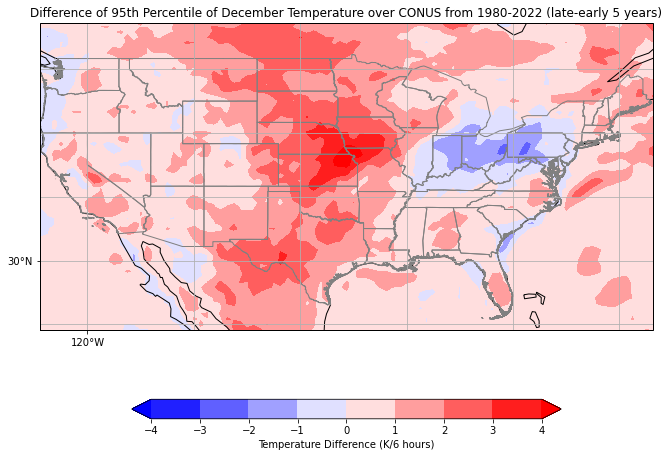

In [26]:
#clevs=np.arange(-1.0,1.0,10)
max_val=4
increment=1

clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=diff_dec_95th
data,lon=add_cyclic_point(data,coord=dec_ts['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,dec_ts['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')


# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Temperature Difference (K/6 hours)')

# Add title
plt.title('Difference of 95th Percentile of December Temperature over CONUS from 1980-2022 (late-early 5 years)')
plt.savefig('/homes/areed29/CLIM997/summer22_research/dec_diff_temp_95th.png')

In [27]:
#II. January
diff_jan_95th=values_last.sel(month=1)-values.sel(month=1)
print(diff_jan_95th)

<xarray.DataArray 'T2M' (lat: 62, lon: 117)>
array([[ 6.95664978e-01,  8.08479309e-01,  6.76412964e-01, ...,
         3.82797241e-01,  4.35374451e-01,  4.66323853e-01],
       [ 5.21932983e-01,  7.25315857e-01,  7.56501770e-01, ...,
         3.94921875e-01,  3.93118286e-01,  4.73831177e-01],
       [ 3.90197754e-01,  4.93577576e-01,  6.01536560e-01, ...,
         4.77450562e-01,  5.06228638e-01,  5.24998474e-01],
       ...,
       [-1.00870209e+00, -7.43052673e-01, -3.12933350e-01, ...,
         6.50732422e-01,  2.99465942e-01,  8.16879272e-02],
       [-6.15821838e-01, -2.74929810e-01, -1.02590942e-01, ...,
         7.09378052e-01,  4.71102905e-01,  5.52246094e-02],
       [-7.03718567e-01, -2.89334106e-01, -9.24682617e-04, ...,
         9.17466736e-01,  4.04682922e-01,  1.10931396e-02]])
Coordinates:
  * lon       (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -56.25 -55.62 -55.0
  * lat       (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 51.0 51.5 52.0 52.5
    quantile  float64 0.95
 

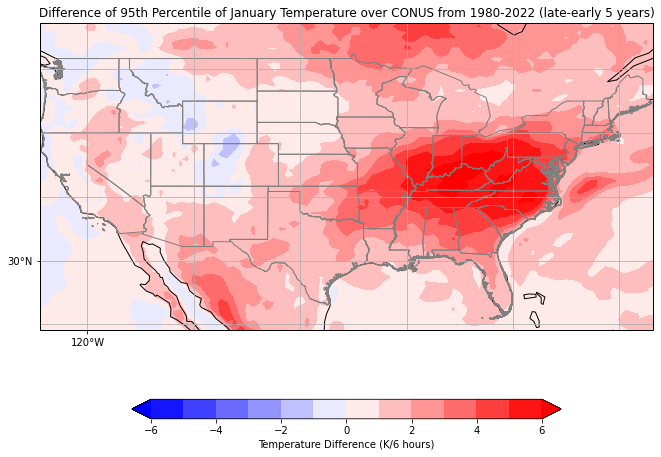

In [29]:
#clevs=np.arange(-1.0,1.0,10)
max_val=6
increment=1

clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=diff_jan_95th
data,lon=add_cyclic_point(data,coord=dec_ts['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,dec_ts['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')


# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Temperature Difference (K/6 hours)')

# Add title
plt.title('Difference of 95th Percentile of January Temperature over CONUS from 1980-2022 (late-early 5 years)')
plt.savefig('/homes/areed29/CLIM997/summer22_research/jan_diff_temp_95th.png')

In [30]:
#III. Feburary
diff_feb_95th=values_last.sel(month=2)-values.sel(month=2)
print(diff_feb_95th)

<xarray.DataArray 'T2M' (lat: 62, lon: 117)>
array([[-0.10139465,  0.03016815,  0.17763367, ...,  0.53437653,
         0.57944794,  0.586409  ],
       [-0.10840607, -0.09421387,  0.04782562, ...,  0.53345032,
         0.5223053 ,  0.51425476],
       [-0.03467255,  0.10257416, -0.00893555, ...,  0.5660553 ,
         0.49084625,  0.47137146],
       ...,
       [-1.3608963 , -1.41519623, -0.86023407, ..., -0.868367  ,
        -0.61053467, -0.4165451 ],
       [-1.68843689, -0.78704834, -0.63089905, ..., -1.23577576,
        -0.62480164, -0.5621994 ],
       [-0.85031281, -0.21703339, -0.34858704, ..., -1.28679199,
        -0.84082947, -0.61354523]])
Coordinates:
  * lon       (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -56.25 -55.62 -55.0
  * lat       (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 51.0 51.5 52.0 52.5
    quantile  float64 0.95
    month     int64 2


/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as 

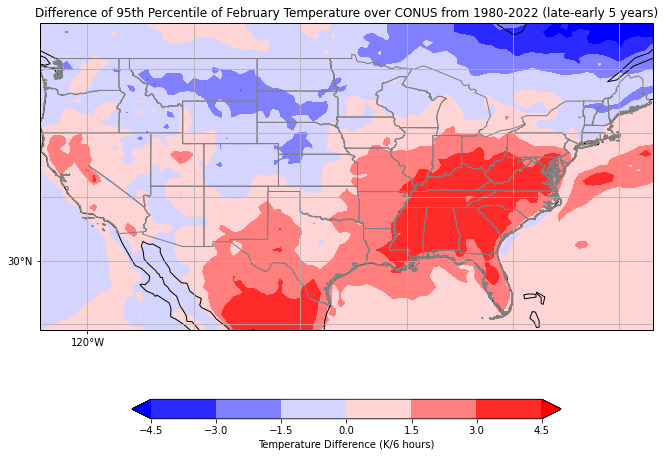

In [31]:
#clevs=np.arange(-1.0,1.0,10)
#max_val=60
#increment=15

#clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=diff_feb_95th
data,lon=add_cyclic_point(data,coord=dec_ts['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,dec_ts['lat'],
            data,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')


# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Temperature Difference (K/6 hours)')

# Add title
plt.title('Difference of 95th Percentile of February Temperature over CONUS from 1980-2022 (late-early 5 years)')
plt.savefig('/homes/areed29/CLIM997/summer22_research/feb_diff_temp_95th.png')